# Differential Gene Expression

In [43]:
%pwd
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Patch
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from imblearn.over_sampling import SMOTE
import csv

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Helvetica"
matplotlib.rcParams['font.family'] = "sans-serif"

#Random Number
r = 42

## Load Data

In [2]:
#Loading in data
df = pd.read_csv('Output/expression_matrix.txt', index_col=0).T
dfanno = pd.read_csv('Output/metadata.txt', index_col=0, header=None, squeeze = True)

#Load Genes
genes = pd.read_csv('Output/100_ranked_genes.txt', squeeze=True, header=0)
genes

0      SUMF1 / 11720732_a_at
1      MYEOV / 11755024_a_at
2       SMOX / 11741507_a_at
3      TMCC2 / 11721929_x_at
4        BMF / 11737438_a_at
               ...          
95     SRP14 / 11718663_s_at
96    ZNF271 / 11750558_s_at
97     LMOD2 / 11736713_a_at
98     PVRL3 / 11758970_a_at
99    ZNF471 / 11751506_a_at
Name: 0, Length: 100, dtype: object

In [3]:
#Choose Genes
df = df[genes]
df = df.astype(float)
df

,SUMF1 / 11720732_a_at,MYEOV / 11755024_a_at,SMOX / 11741507_a_at,TMCC2 / 11721929_x_at,BMF / 11737438_a_at,BCL2L11 / 11763147_x_at,AKR1C2 / 11738244_s_at,SLC6A13 / 11759654_a_at,KANSL3 / 11750658_x_at,BPIFA4P / 11750322_at,...,PPARD / 11735395_at,CYP4A11 || CYP4A22 / 11741459_s_at,TRIM10 / 11758611_s_at,TCF7L2 / 11747829_x_at,AGO3 / 11756925_a_at,SRP14 / 11718663_s_at,ZNF271 / 11750558_s_at,LMOD2 / 11736713_a_at,PVRL3 / 11758970_a_at,ZNF471 / 11751506_a_at
116_S_1249,-1.277643,-0.831099,0.807886,-0.941795,-0.573300,-0.448990,1.874984,0.166623,-0.528348,0.453522,...,-2.318080,-0.278232,0.191825,-1.675184,1.761589,0.500874,0.786248,0.395471,0.045678,1.078144
037_S_4410,-1.347309,-1.193127,-2.097621,-0.679543,-2.129096,-0.515147,-0.343558,-0.404871,-1.711251,-0.203923,...,-1.070732,-1.589246,-1.900826,-0.001264,3.326655,0.612513,1.977041,-0.710868,0.264972,-0.886165
006_S_4153,-0.731320,-0.360772,-0.864382,-0.737287,-2.221913,0.571223,-0.507894,0.752405,-0.198381,0.164246,...,0.726917,0.156812,-0.791592,-0.921778,0.505739,1.238660,-0.037046,1.185712,1.603651,-0.701289
116_S_1232,0.698655,0.369473,1.119981,0.930056,0.067581,-1.660709,-0.407466,-0.258426,0.474006,-1.038878,...,-1.176206,1.314973,1.524941,0.259312,0.798680,0.758128,-0.352046,2.050330,-0.144160,0.746907
099_S_4205,-0.243661,-0.654726,-1.440825,-0.643454,-0.714736,0.069822,2.285825,-0.865638,-0.297993,-0.795624,...,-1.139519,-2.171266,-1.761131,0.318792,0.326719,-0.159251,0.013067,0.953288,0.107866,0.600547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
009_S_2381,-0.390326,-0.651632,0.834670,1.567640,2.273098,3.377678,-1.347836,-0.362009,0.442877,-0.341986,...,-0.465401,1.632438,0.943958,-0.570567,-0.009621,0.563974,-0.242273,-0.562116,-1.256998,-0.169770
053_S_4557,-0.995315,1.152319,0.339744,-0.248873,1.720614,0.188208,-2.215167,0.009462,-1.350154,-0.881091,...,0.172031,-0.372296,1.017968,-1.428769,0.337569,0.850352,0.590566,0.990476,-0.687487,0.007403
073_S_4300,-0.082331,2.009429,1.281851,-0.268121,-0.560041,1.539206,0.240749,-0.512026,-0.291768,-0.177625,...,0.153687,0.832896,1.332514,0.174342,1.748027,0.364966,1.027270,0.878913,-0.550018,-2.018531
041_S_4014,0.566658,-0.382432,-1.105440,-0.330677,2.175861,0.167316,-0.133572,-0.136983,1.389199,1.761838,...,0.227061,0.932839,0.065081,-1.239002,-1.620798,1.374568,-0.449886,-0.729462,-0.913327,-0.239099


In [4]:
#Oversampling
X, y = SMOTE(random_state=r, n_jobs=-1).fit_resample(df, dfanno)

In [5]:
def fixedWidthClusterMap(df, cmap='RdBu_r', s=30, top=0.05, side=20, num=20, bar=0, up=0, t=0.02, z_score=True):
    # Calulate the figure size
    dpi = plt.rcParams['figure.dpi']
    mw = plt.rcParams['figure.subplot.right']-plt.rcParams['figure.subplot.left']
    mh = plt.rcParams['figure.subplot.top']-plt.rcParams['figure.subplot.bottom']
    Ny,Nx = df.shape
    w = (Nx*s/dpi)/0.8/mw
    h = (Ny*s/dpi)/0.8/mh
    axWidth = (Nx*s)/(w*dpi)
    axHeight = (Ny*s)/(h*dpi)
    
    # do the actual plot
    if z_score:
        grid = sns.clustermap(df, figsize=(w, h), metric="euclidean", center=0, cmap=cmap, cbar_kws={"orientation": "horizontal"}, z_score=0)
    else:
        grid = sns.clustermap(df, figsize=(w, h), metric="euclidean", center=0, cmap=cmap, cbar_kws={"orientation": "horizontal"})


    # resize dendrograms to match
    row = grid.ax_row_dendrogram.get_position()
    grid.ax_row_dendrogram.set_position([row.x0-row.width*(side-1), row.y0, 
                                         row.width*side, axHeight])
    col = grid.ax_col_dendrogram.get_position()
    grid.ax_col_dendrogram.set_position([col.x0, col.y0+col.height*0.01-col.height*up,
                                         axWidth, col.height*top])

    # resize heatmap
    hm = grid.ax_heatmap.get_position()
    grid.ax_heatmap.set_position([hm.x0, hm.y0, 
                                  axWidth, axHeight])

    cbar = grid.cax.get_position()
    grid.cax.set_position([cbar.x0, cbar.y0+col.height*top-col.height*bar-col.height*up, .8, t/(num/20)])

    return grid

In [6]:
#Heatmap Gene Expression
def geheatmapclust(X, c, title='', top=0.05, side=20, num=20, s=30, bar=0, up=0, t=0.02):
    #Gene Expression
    ge = pd.DataFrame()
    c = c[c!="NA"]
    for i in c.unique():
        ge[i] = X.T[c[c==i].index].mean(axis=1)

    #Sort
    ge['Standard Deviation'] = ge.std(axis=1) #Standard Deviation
    ge = ge.sort_values(by=['Standard Deviation'], ascending=False)
    ge = ge.drop(['Standard Deviation'], axis=1) 
    
    #Heatmap
    if num=='all':
        cm = fixedWidthClusterMap(ge, top=top, side=side, num=ge.shape[1], bar=bar, s=s, up=up, t=t)
    else:
        cm = fixedWidthClusterMap(ge[:num], top=top, side=side, num=num, bar=bar, s=s, up=up, t=t)

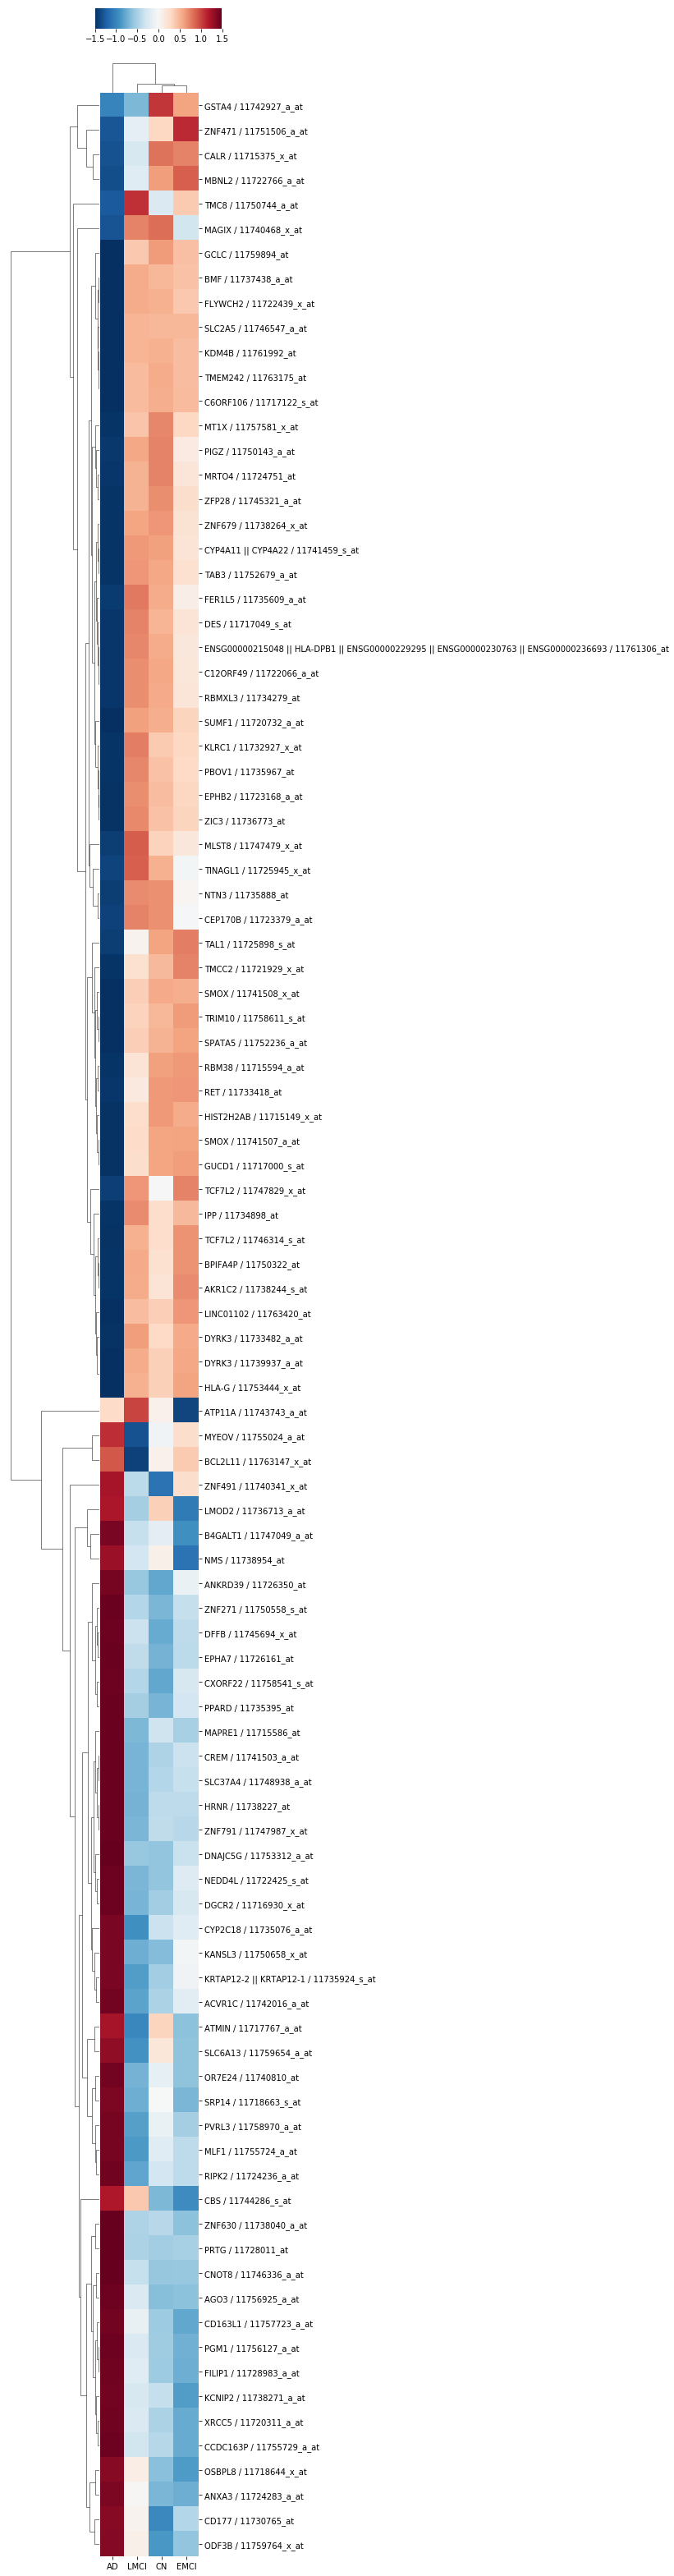

In [20]:
geheatmapclust(X, y, s=30, num='all', t=0.001, bar=0.15)

In [23]:
ge = pd.DataFrame()
c = y[y!="NA"]
for i in c.unique():
    ge[i] = X.T[c[c==i].index].mean(axis=1)

#Sort
ge['Standard Deviation'] = ge.std(axis=1) #Standard Deviation
ge = ge.sort_values(by=['Standard Deviation'], ascending=False)
ge = ge.drop(['Standard Deviation'], axis=1) 

In [27]:
ge

,CN,AD,EMCI,LMCI
SMOX / 11741507_a_at,0.074294,-0.771762,0.077127,-0.053420
SMOX / 11741508_x_at,0.059803,-0.715647,0.051852,-0.014800
DES / 11717049_s_at,0.046218,-0.693626,-0.070561,0.135125
KCNIP2 / 11738271_a_at,0.019145,0.681418,-0.156761,0.056965
HRNR / 11738227_at,0.002674,0.661373,0.004378,-0.107116
...,...,...,...,...
CCDC163P / 11755729_a_at,-0.020956,0.190777,-0.057926,-0.006341
TMC8 / 11750744_a_at,-0.055227,-0.169077,0.013898,0.092943
DGCR2 / 11716930_x_at,-0.019136,0.197820,0.010433,-0.038516
CYP2C18 / 11735076_a_at,0.021420,0.206685,0.035528,-0.041767


In [50]:
table = pd.DataFrame(stats.zscore(ge.T).T, columns=ge.columns, index=ge.index)
table = table[['AD', 'LMCI', 'EMCI', 'CN']]
table.index = table.index.str.replace(' / ','_')
table

,AD,LMCI,EMCI,CN
SMOX_11741507_a_at,-1.712542,0.326488,0.697048,0.689006
SMOX_11741508_x_at,-1.725163,0.430248,0.635231,0.659683
DES_11717049_s_at,-1.687763,0.865069,0.231486,0.591207
KCNIP2_11738271_a_at,1.675105,-0.293970,-0.967908,-0.413227
HRNR_11738227_at,1.712846,-0.813427,-0.446910,-0.452509
...,...,...,...,...
CCDC163P_11755729_a_at,1.699039,-0.338276,-0.871431,-0.489332
TMC8_11750744_a_at,-1.452271,1.271377,0.449717,-0.268823
DGCR2_11716930_x_at,1.702078,-0.809395,-0.289229,-0.603455
CYP2C18_11735076_a_at,1.643143,-1.056542,-0.216647,-0.369953


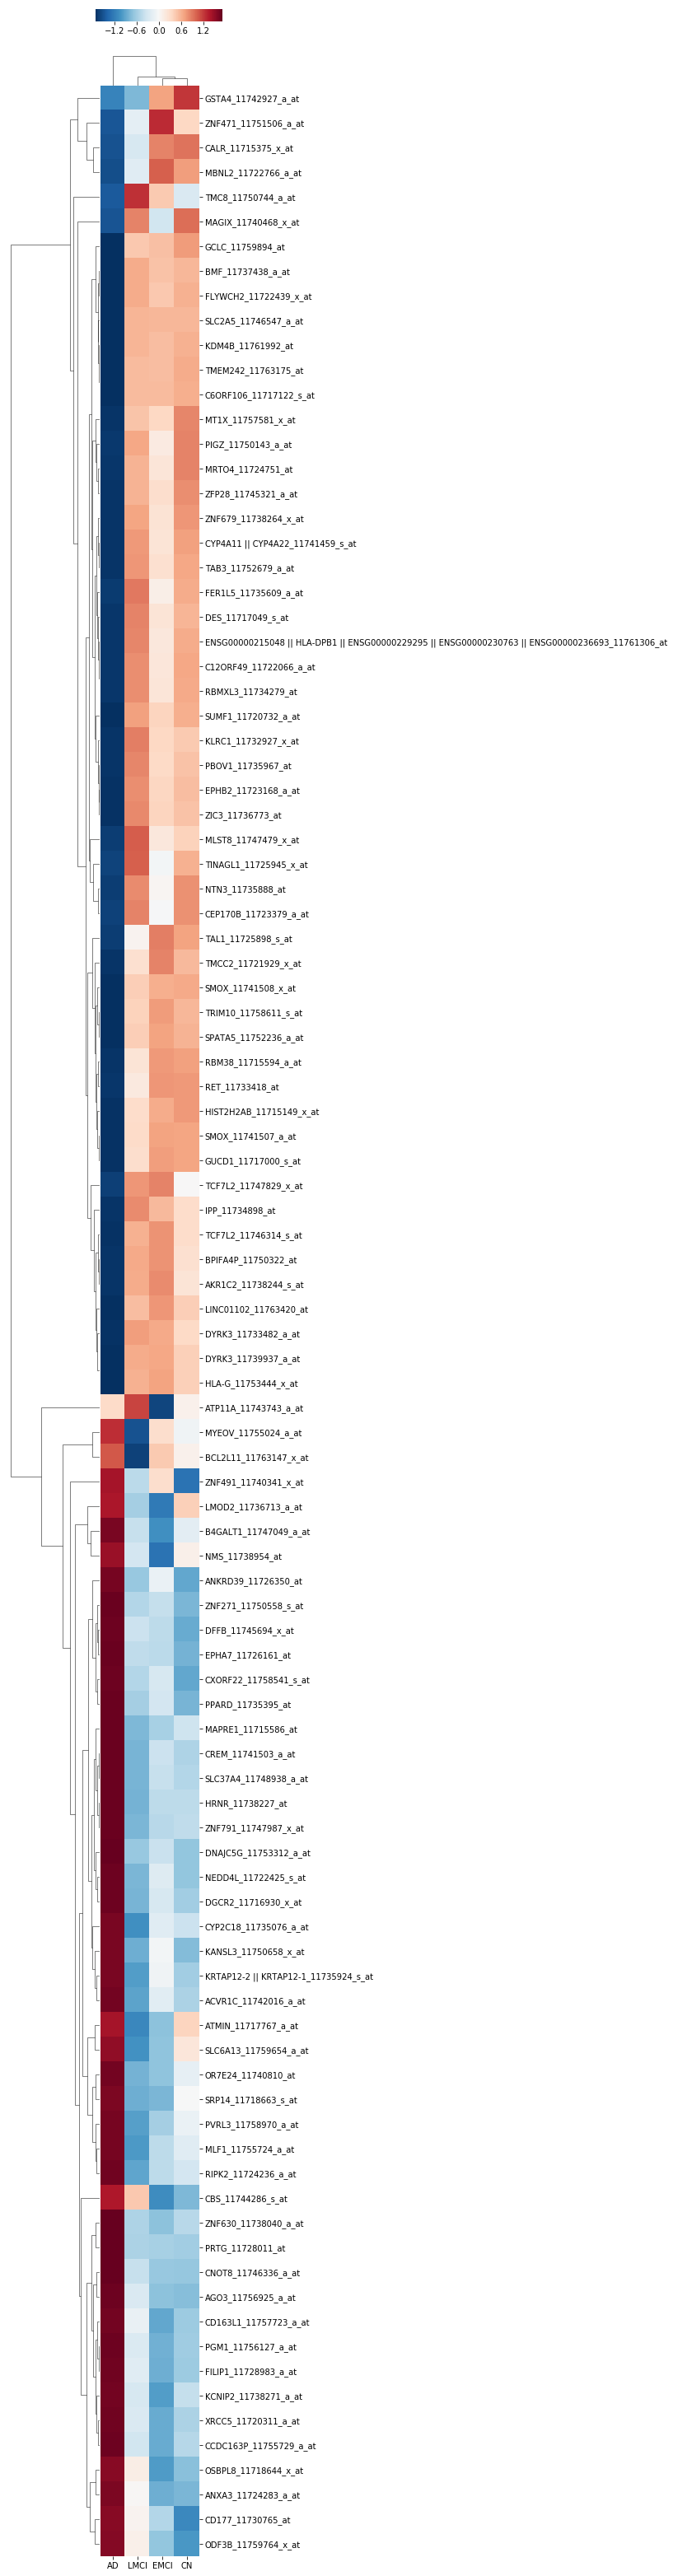

In [54]:
fixedWidthClusterMap(table, z_score=False, t=0.003, bar=0.15)
plt.savefig('Graphs/Clustering/ge.pdf', format='pdf', transparent=True)

In [52]:
table.to_csv('Output/differential_gene_expression.txt', quoting=csv.QUOTE_MINIMAL)
